In [2]:
import igraph

graph = igraph.Graph(n=10, edges=[(0,1),(1,2),(0,2),(3,4),(3,5),(5,6),(6,7),(5,8),(6,8),(0,9),(8,9)])

vertices = graph.vs
edges = graph.es

duration_weights = [10, 5, 10, 3, 7, 4, 6, 5, 4, 2, 7]
graph.es["duration"] = duration_weights
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
graph.vs["value"] = values
print(graph)




IGRAPH U--- 10 11 --
+ attr: value (v), duration (e)
+ edges:
0--1 1--2 0--2 3--4 3--5 5--6 6--7 5--8 6--8 0--9 8--9


In [3]:
print('#########FILTERED EDGES#########')
edge_sequence = graph.es.select(lambda edge: edge["duration"] < 5)
print([edge.index for edge in edge_sequence])

print('#########SPANNING TREE#########')
spanning_tree = graph.spanning_tree()
print(spanning_tree)


#########FILTERED EDGES#########
[3, 5, 8, 9]
#########SPANNING TREE#########
IGRAPH U--- 10 9 --
+ attr: value (v), duration (e)
+ edges:
0--1 0--2 3--4 3--5 6--7 5--8 6--8 0--9 8--9


<AxesSubplot:title={'center':'Spanning Tree'}>

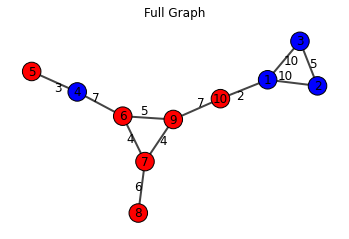

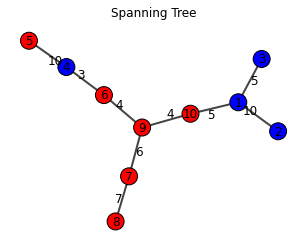

In [4]:
import matplotlib.pyplot as plt

visual_style = {}
visual_style["vertex_color"] = ["blue" if value < 5 else "red" for value in graph.vs["value"]]
visual_style["vertex_label"] = [str(value) for value in graph.vs["value"]]
visual_style["edge_label"] = [str(duration) for duration in graph.es["duration"]]
#visual_style["layout"] = graph.layout_kamada_kawai()
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
ax.set_title("Full Graph")
igraph.plot(graph, target=ax, **visual_style)
ax2.set_title("Spanning Tree")
igraph.plot(spanning_tree, target=ax2, **visual_style)